In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Check the dataset info

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age and cabin have missing values that we need to fill

In [ ]:
train_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
test_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Age', ylabel='Count'>

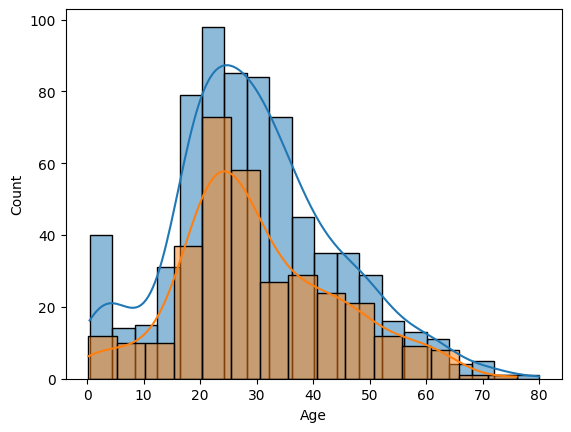

In [ ]:
sns.histplot(data=train_data,x='Age', kde = True)
sns.histplot(data=test_data,x='Age', kde = True)

In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [ ]:
# create bins for ages
bins = [0, 15, 30, 45, 60, np.inf]

names = ['<15', '15-30', '30-45', '45-60', '60+']

train_data['Age_bin'] = pd.cut(train_data['Age'], bins, labels = names)
test_data['Age_bin'] = pd.cut(test_data['Age'], bins, labels = names)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-45


In [ ]:
# Creating a new family size column
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp']
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-45,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-45,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-45,0


In [ ]:
# Encoding the categorical columns
train_data.Sex = pd.factorize(train_data.Sex)[0]
train_data.Embarked = pd.factorize(train_data.Embarked)[0]
train_data.Age_bin = pd.factorize(train_data.Age_bin)[0]
train_data.sample(10)

test_data.Sex = pd.factorize(test_data.Sex)[0]
test_data.Embarked = pd.factorize(test_data.Embarked)[0]
test_data.Age_bin = pd.factorize(test_data.Age_bin)[0]


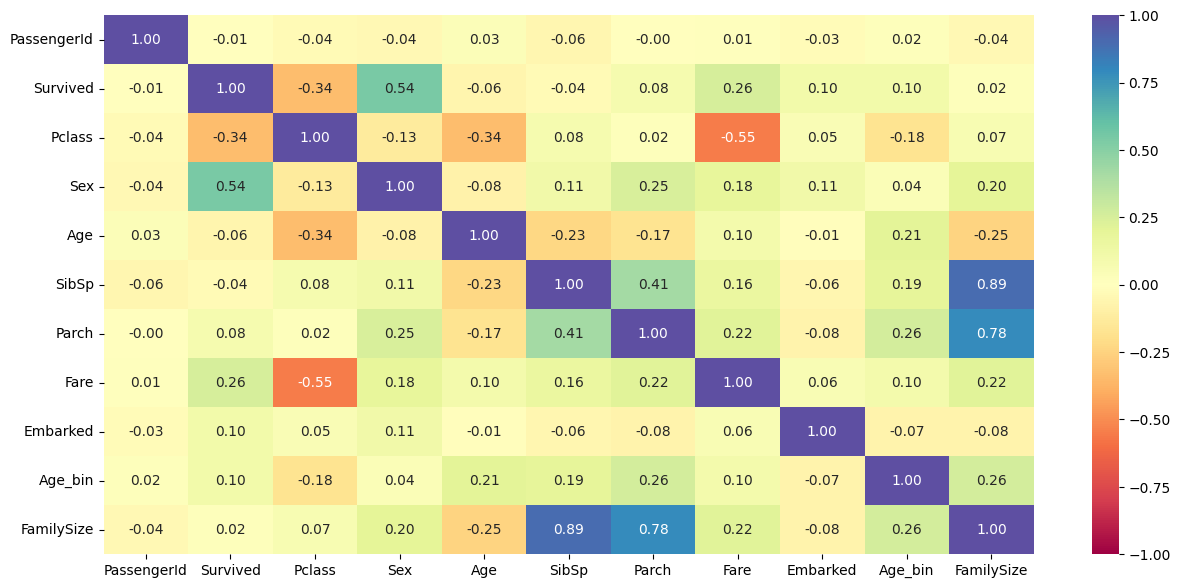

In [ ]:
# Correlation check
cols_list = train_data.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize = (15, 7))
sns.heatmap(
    train_data[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

In [ ]:
# Dropping unnecessary columns
train_data.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Age'], axis = 1, inplace = True)
test_data.drop(['Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Age'], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_bin,FamilySize
0,0,3,0,7.2500,0,0,1
1,1,1,1,71.2833,1,1,1
2,1,3,1,7.9250,0,0,0
3,1,1,1,53.1000,0,1,1
4,0,3,0,8.0500,0,1,0


In [ ]:
# looking if the data is balanced
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# calculating weights for imbalanced data
wght_0 = 549/(549+342)
wght_1 = 342/(549+342)
print (wght_0, wght_1)

0.6161616161616161 0.3838383838383838


In [ ]:
# calculate weights using sklearn
from sklearn.utils.class_weight import compute_class_weight
y_0 = np.zeros(549)
y_1 = np.ones(342)
y = np.concatenate([y_0, y_1])
print(len(y))

classes=[0,1]
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = classes,
                                        y = y
                                    )
class_weights = dict(zip(np.unique(classes), class_weights))
print(class_weights)

891
{0: 0.8114754098360656, 1: 1.3026315789473684}


# Split the training set

In [ ]:
pcnt = .8

# Random state is a seed value
train = train_data.sample(frac = pcnt, random_state = 14)

test = train_data.drop(train.index)

# Create train and test datasets

X_train = train[['Pclass', 'Sex', 'Age_bin', 'Embarked', 'FamilySize', 'Fare']]

X_test = test[['Pclass', 'Sex', 'Age_bin', 'Embarked', 'FamilySize', 'Fare']]

y_train = train['Survived']

y_test = test['Survived']

np.random.seed(0)

**Random Forest**

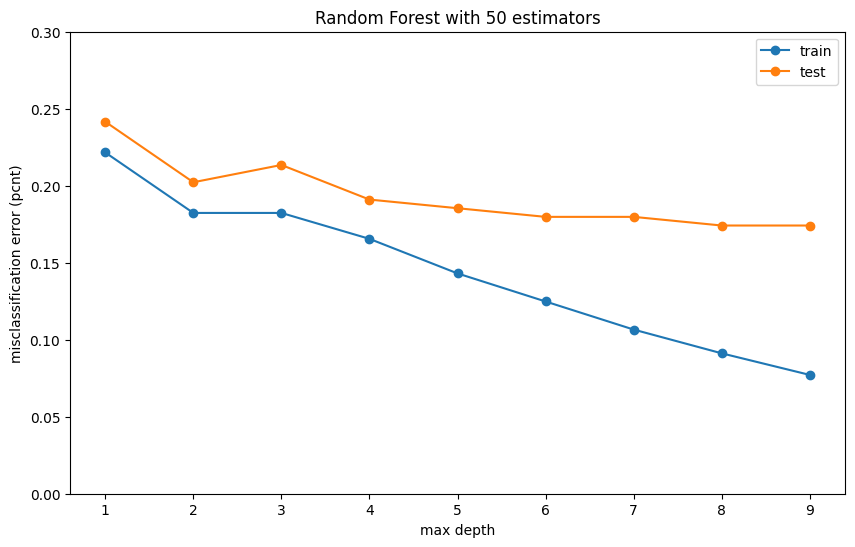

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []

test_scores = []

for depth in range(1, 10):

    clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 50)

    clf = clf.fit(X_train, y_train)

    train_scores.append(1 - clf.score(X_train, y_train))

    test_scores.append(1 - clf.score(X_test, y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'upper right')

plt.xlabel('max depth')

plt.ylim(0, 0.3)

plt.ylabel('misclassification error (pcnt)')

plt.title(f"Random Forest with 50 estimators")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Survived', 'Survived'], yticklabels = ['Not Survived', 'Survived'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.8114754098360656, 1: 1.3026315789473684}, random_state = 1)

rf_estimator.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.8114754098360656,
                                     1: 1.3026315789473684},
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       435
           1       0.94      0.91      0.92       278

    accuracy                           0.94       713
   macro avg       0.94      0.94      0.94       713
weighted avg       0.94      0.94      0.94       713



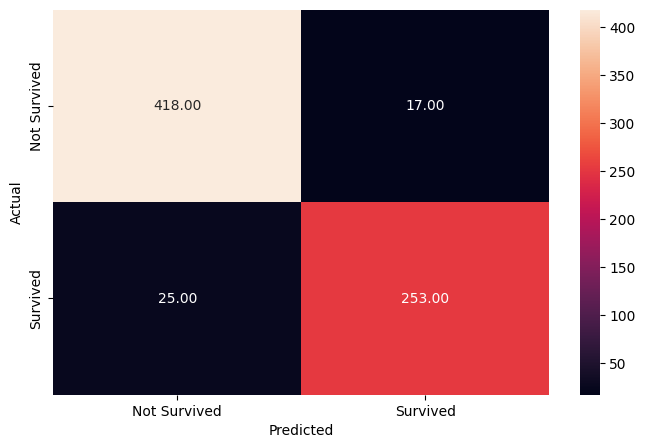

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       114
           1       0.72      0.72      0.72        64

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



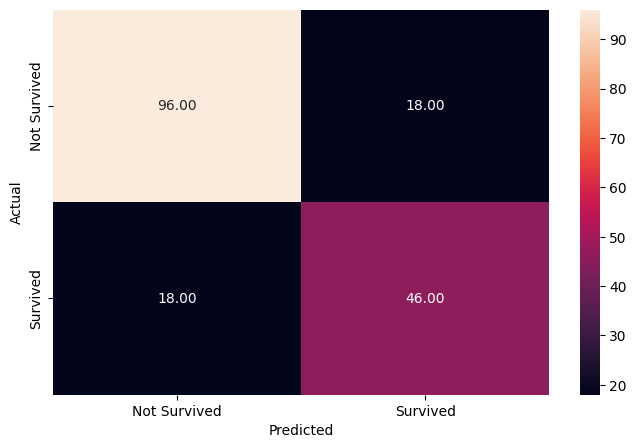

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_weights = RandomForestClassifier(class_weight = {0: 0.8114754098360656, 1: 1.3026315789473684},random_state = 0, criterion = 'entropy', max_depth = 6, n_estimators = 50)
rf_estimator_weights.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.8114754098360656,
                                     1: 1.3026315789473684},
                       criterion='entropy', max_depth=6, n_estimators=50,
                       random_state=0)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       435
           1       0.86      0.78      0.82       278

    accuracy                           0.87       713
   macro avg       0.86      0.85      0.86       713
weighted avg       0.86      0.87      0.86       713



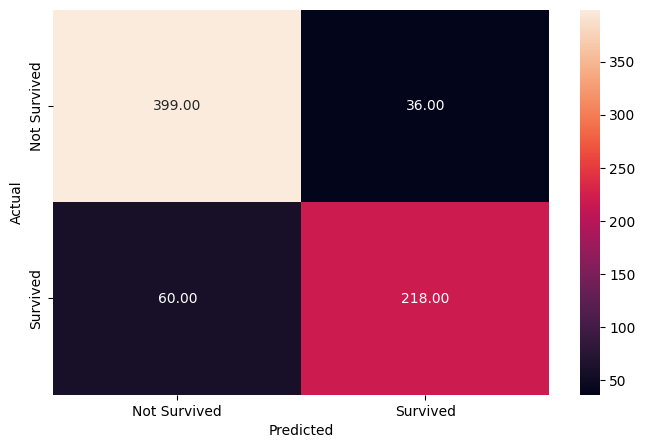

In [ ]:
# Checking performance on the training data
y_pred_train_rf1 = rf_estimator_weights.predict(X_train)

metrics_score(y_train, y_pred_train_rf1)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       114
           1       0.76      0.69      0.72        64

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



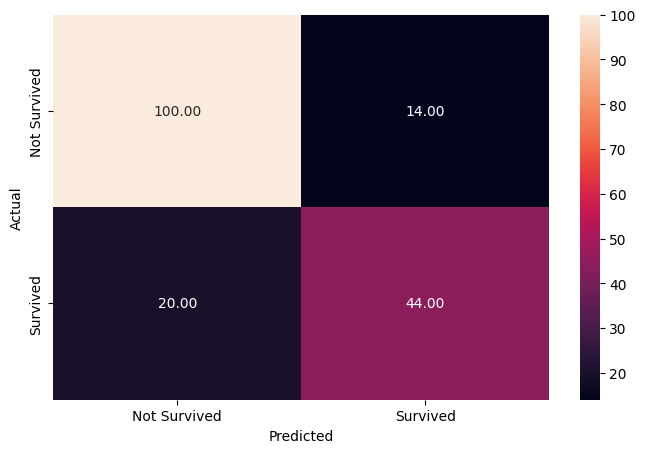

In [ ]:
# Checking performance on the testing data
y_pred_test_rf1 = rf_estimator_weights.predict(X_test)

metrics_score(y_test, y_pred_test_rf1)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.8114754098360656, 1: 1.3026315789473684}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'sqrt'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.8114754098360656,
                                     1: 1.3026315789473684},
                       min_samples_leaf=2, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       435
           1       0.89      0.85      0.87       278

    accuracy                           0.90       713
   macro avg       0.90      0.89      0.90       713
weighted avg       0.90      0.90      0.90       713



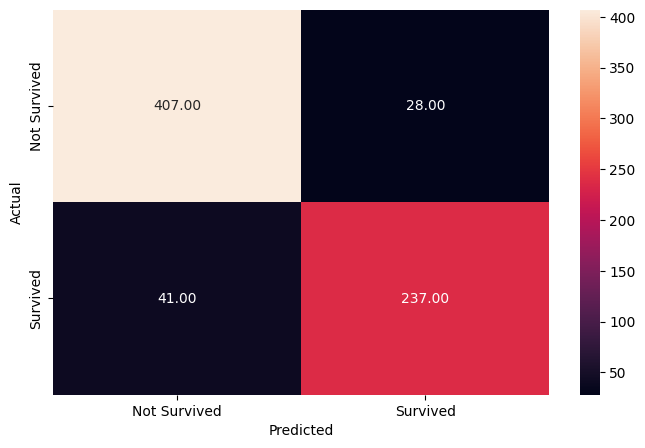

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       114
           1       0.72      0.77      0.74        64

    accuracy                           0.81       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



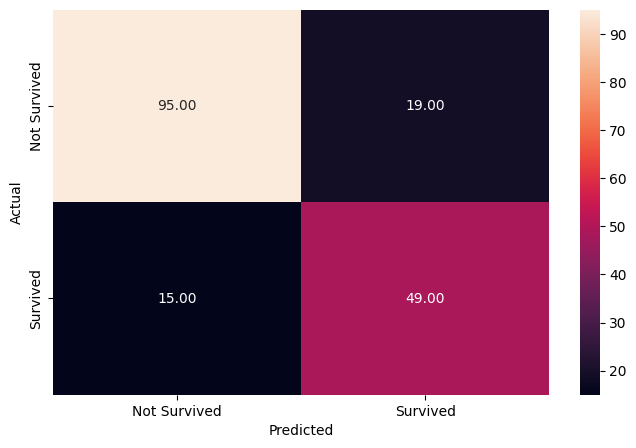

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
pas_ids = pd.DataFrame(columns=['PassengerId'])
pas_ids['PassengerId'] = test_data['PassengerId']
test_data.drop(['PassengerId'], axis = 1, inplace = True)

In [ ]:
test_data.head()

,Pclass,Sex,Fare,Embarked,Age_bin,FamilySize
0,3,0,7.8292,0,0,0
1,3,1,7.0000,1,1,1
2,2,0,9.6875,0,2,0
3,3,0,8.6625,1,3,0
4,3,1,12.2875,1,3,2


In [ ]:
X_train.head()

,Pclass,Sex,Age_bin,Embarked,FamilySize,Fare
75,3,0,0,0,0,7.650
602,1,0,0,0,0,42.400
119,3,1,3,0,6,31.275
647,1,0,2,1,0,35.500
115,3,0,0,0,0,7.925


In [ ]:
test_data = test_data.reindex(columns=['Pclass', 'Sex', 'Age_bin', 'Embarked', 'FamilySize', 'Fare'])

In [ ]:
test_data.head()

,Pclass,Sex,Age_bin,Embarked,FamilySize,Fare
0,3,0,0,0,0,7.8292
1,3,1,1,1,1,7.0000
2,2,0,2,0,0,9.6875
3,3,0,3,1,0,8.6625
4,3,1,3,1,2,12.2875


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age_bin     418 non-null    int64  
 3   Embarked    418 non-null    int64  
 4   FamilySize  418 non-null    int64  
 5   Fare        417 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [ ]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [ ]:
predictions = rf_estimator_tuned.predict(test_data)


In [ ]:
output = pd.DataFrame(columns=['PassengerId', 'Survived'])
output['PassengerId'] = pas_ids['PassengerId']
output['Survived'] = predictions
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
